# ** DIscBIO: a user-friendly pipeline for biomarker discovery in single-cell transcriptomics**

The pipeline consists of four successive steps: data pre-processing, cellular clustering and pseudo-temporal ordering, determining differential expressed genes and identifying biomarkers.

![DIsccBIO](DiscBIO.png)

#                      CTC Notebook  [PART 2]

#  Defining outlier cells  and evaluating clusters' stability and consistancy  

## Required Packages

In [1]:
library(DIscBIO)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    

## Loading dataset

The "CTCdataset" dataset consisting of single migratory circulating tumor cells (CTCs) collected from patients with breast cancer. Data are available in the GEO database with accession number GSE51827.The dataset should be formatted in a data frame where columns refer to samples and rows refer to genes. We provide here the possibility to load the dataset either as ".csv" or ".rda" extensions.

In [2]:
load("SC.RData")           # Loading the "SC" object that has include the data of the k-means clustering 
load("Ndata.RData")        # Loading the "Ndata" object and stored in the @ndata will be used to plot the expression of genes 
load("expdata.RData")      # Loading the "expdata" object and stored in the @expdata will be used to plot the expression of genes 
sc<-SC                     # Storing the data of SC in the sc 
sc@ndata<-Ndata
sc@expdata<-expdata

########## Removing the unneeded objects
rm(Ndata)
rm(expdata)
rm(SC)

## 2. Cellular Clustering and Pseudo Time ordering

#### Defining outlier cells based on K-means Clustering

Outlier identification is implemented using a background model based on distribution of transcript counts within a cluster. The background model is computed using the mean and the variance of the expression of each gene in a cluster. Outliers are defined as cells with a minimum of “outlg” outlier genes. Here we are setting the minimum number of outlier genes (the “outlg” parameter) to 5% of the number of filtered genes, this is based on the recommendation of De Vienne et al. (De Vienne et al., 2012). 

The following cells are considered outliers: 




named integer(0)


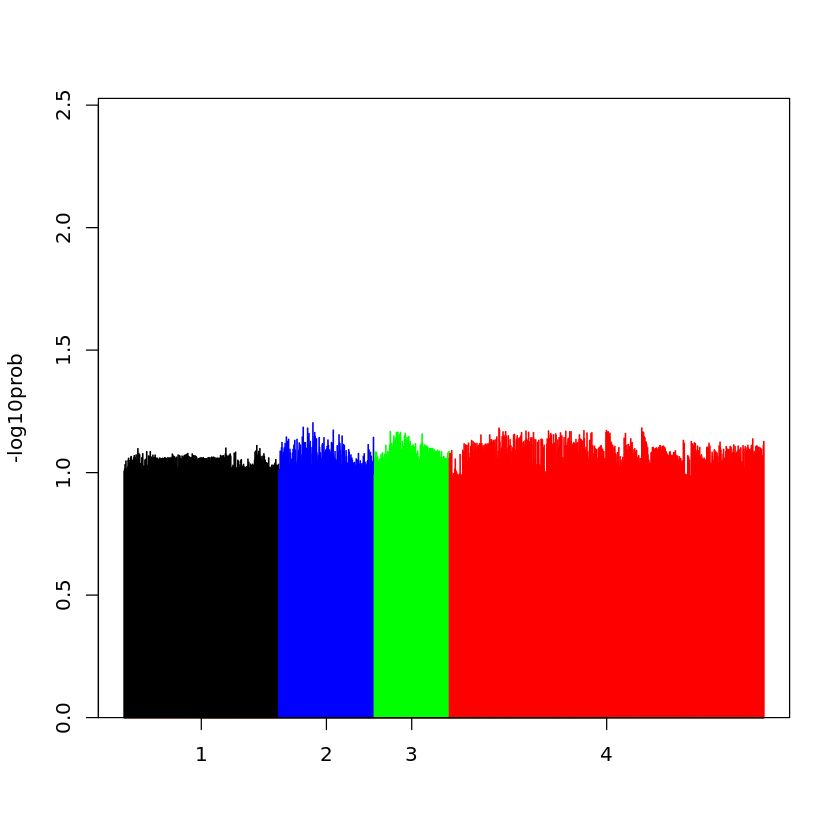

In [3]:
outlg<-round(length(sc@fdata[,1]) * 0.05)     # The cell will be considered as an outlier if it has a minimum of 5% of the number of filtered genes as outlier genes.
Outliers<- FindOutliers(sc, K=4, outminc=5,outlg=outlg,plot = TRUE, quiet = FALSE)

#### Evaluating the stability and consistancy of the clusters

DIscBIO enables the robustness assessment of the detected clusters in terms of stability and consistency using Jaccard’s similarity statistics and silhouette coefficients. Jaccard’s similarity index provides a comparison of members among clusters to evaluate the stability of the clusters with a range from 0% to 100%. The higher the percentage, the more stable the cluster is. Silhouette coefficients estimate how close each sample in one cluster is to samples in the neighboring clusters, reflecting the consistency of each cluster with a range of [-1, 1]. The higher the cluster mean coefficient, the more consistent the cluster is.

### Silhouette plot

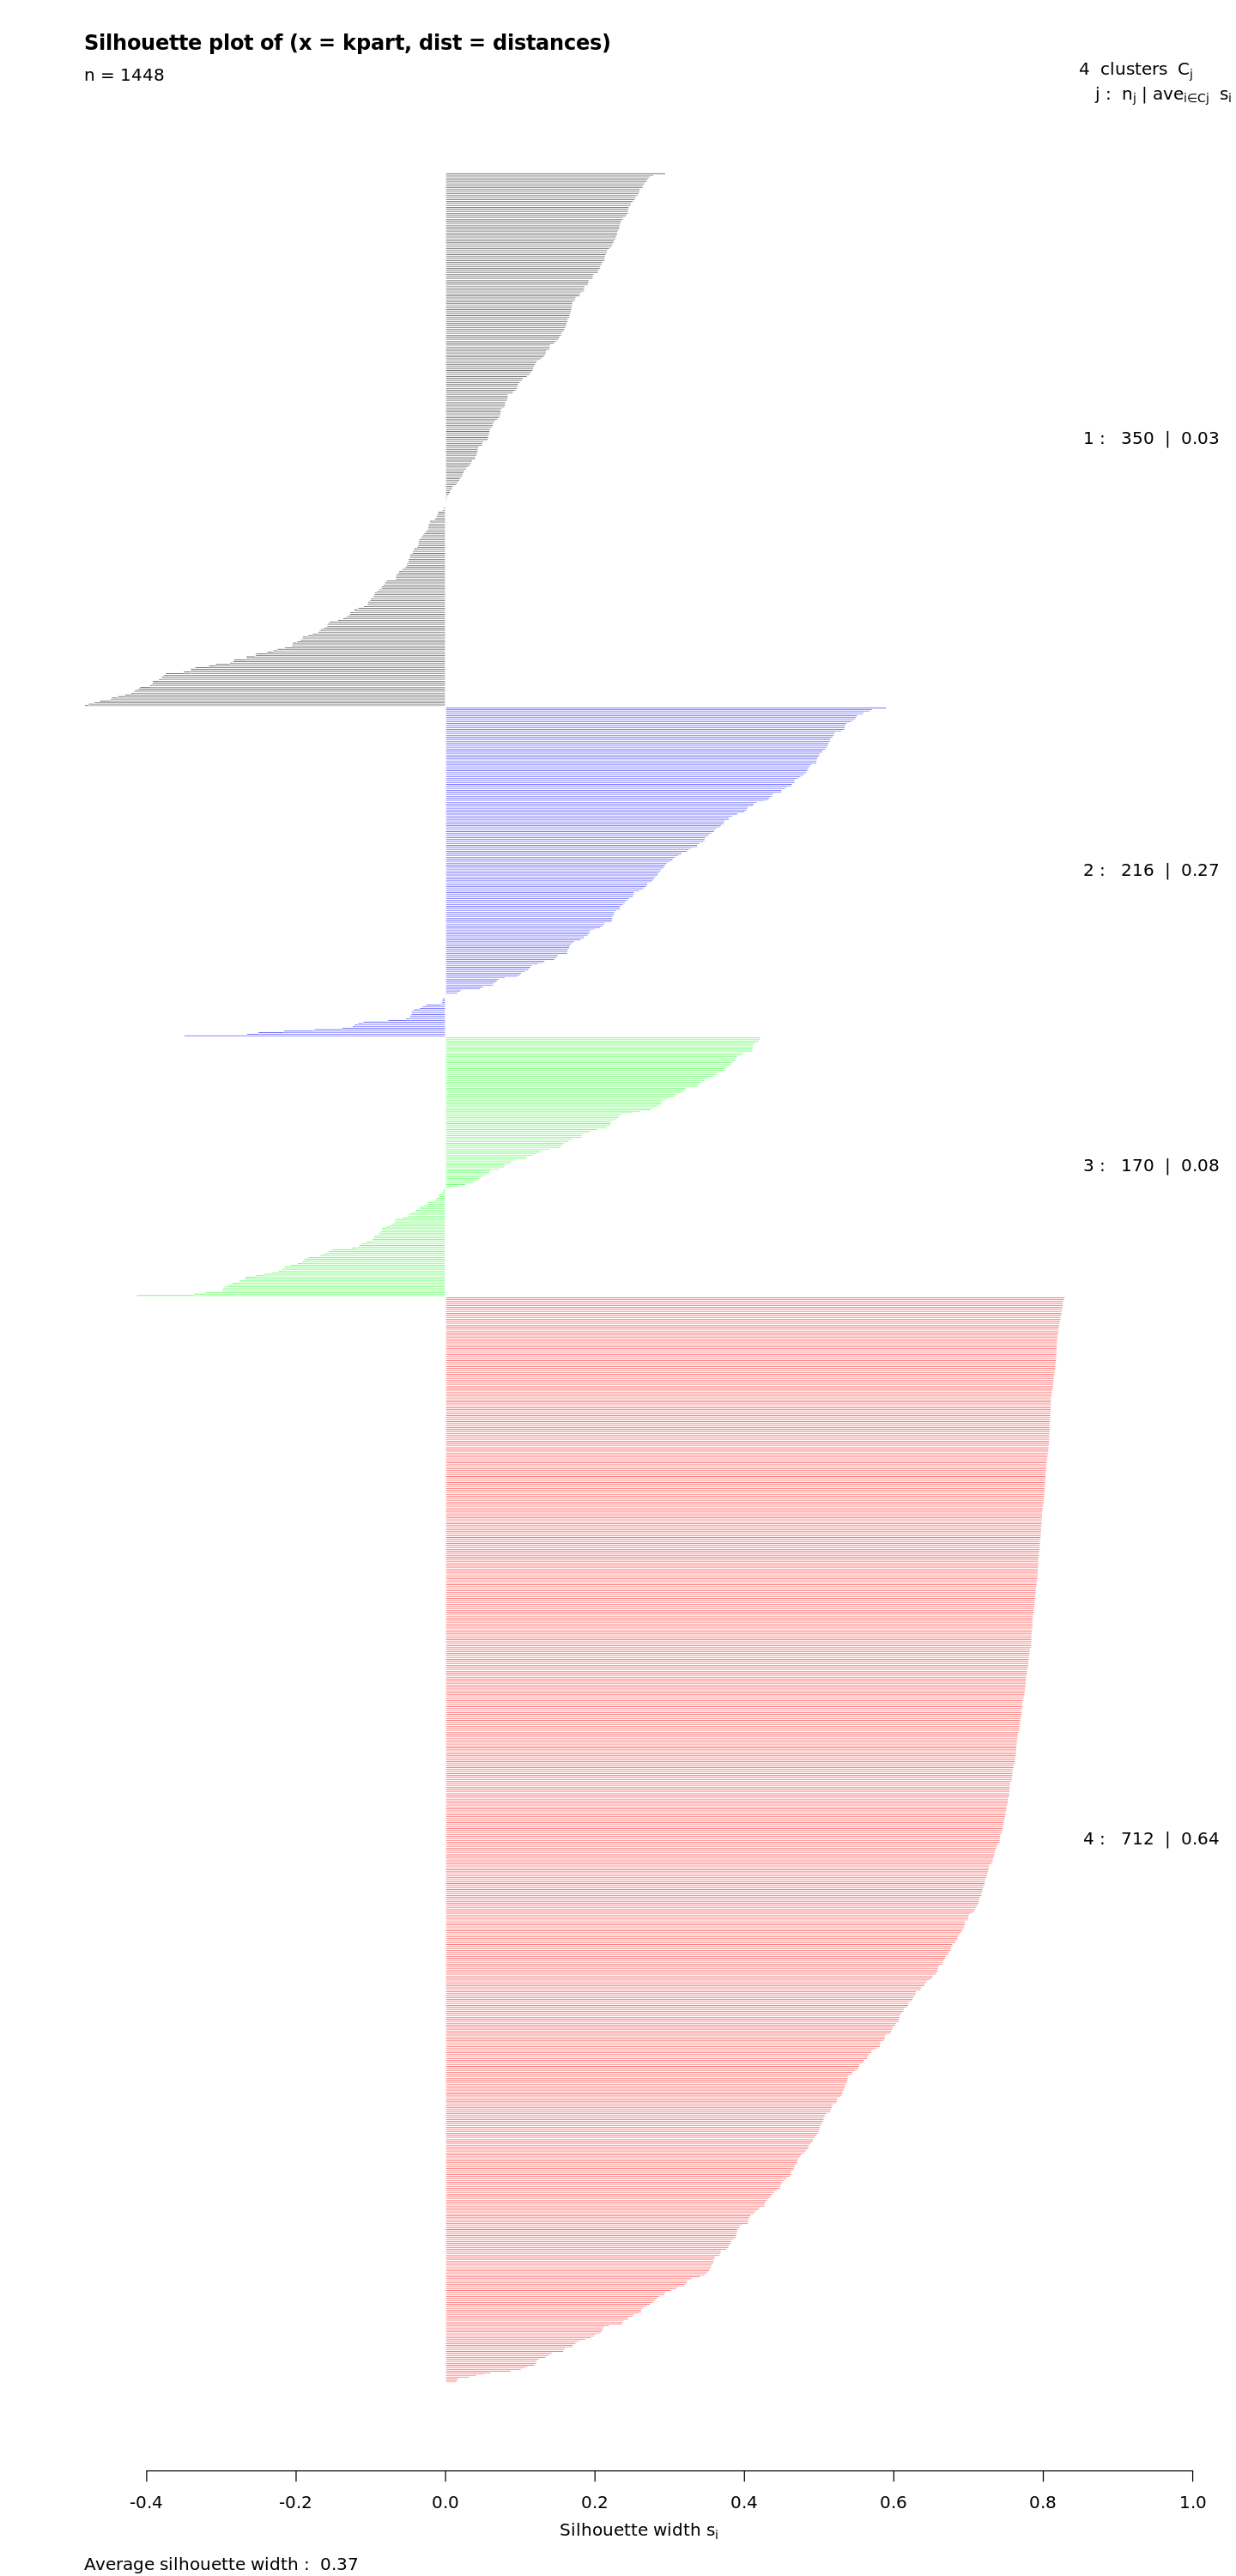

In [4]:
# Silhouette plot
options(repr.plot.width=12, repr.plot.height=25)
plotSilhouette(sc,K=4)       # K is the number of clusters

### Jaccard Plot

#### This function takes time

[1] 0.426 0.648 0.325 0.602

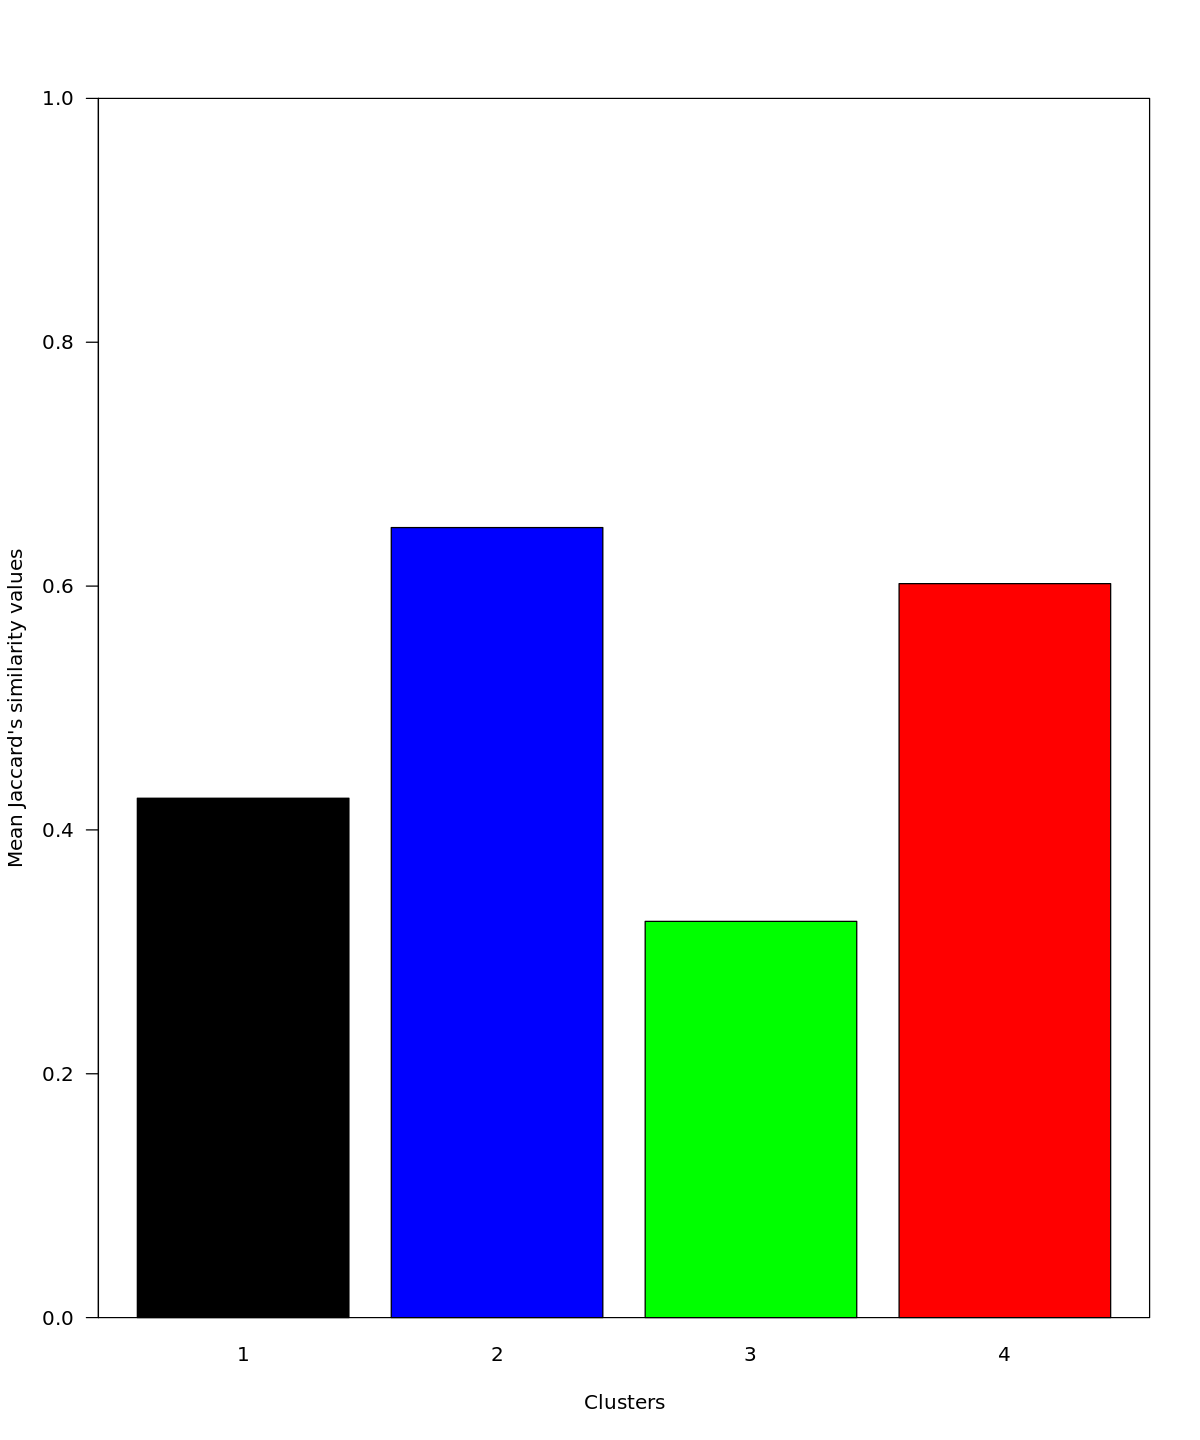

In [5]:
options(repr.plot.width=10, repr.plot.height=12)
Jaccard(sc,Clustering="K-means", K=4, plot = TRUE)     # Jaccard 